In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA


In [2]:
mcdonalds = pd.read_csv("mcdonalds.csv")


print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [3]:
dimensions = mcdonalds.shape
print(dimensions)

(1453, 15)


In [4]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [5]:
# Extract the first 11 columns and convert to a NumPy matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means and round to 2 decimal places
column_means = np.round(np.mean(MD_x, axis=0), 2)

print(column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [6]:

pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Summarize the PCA results
explained_variance = np.round(pca.explained_variance_ratio_, 2)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 2)

# Print the explained variance and cumulative variance
print("Explained variance by each component:")
print(explained_variance)
print("Cumulative explained variance:")
print(cumulative_variance)

Explained variance by each component:
[0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]
Cumulative explained variance:
[0.3  0.49 0.63 0.71 0.77 0.82 0.86 0.9  0.94 0.97 1.  ]


In [7]:
# Print the explained variance and cumulative variance, rounded to 1 decimal place
print("Explained variance by each component:")
print(np.round(explained_variance, 1))
print("Cumulative explained variance:")
print(np.round(cumulative_variance, 1))


print("Principal components:")
print(np.round(pca.components_, 1))

Explained variance by each component:
[0.3 0.2 0.1 0.1 0.1 0.  0.  0.  0.  0.  0. ]
Cumulative explained variance:
[0.3 0.5 0.6 0.7 0.8 0.8 0.9 0.9 0.9 1.  1. ]
Principal components:
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


In [8]:
import matplotlib.pyplot as plt

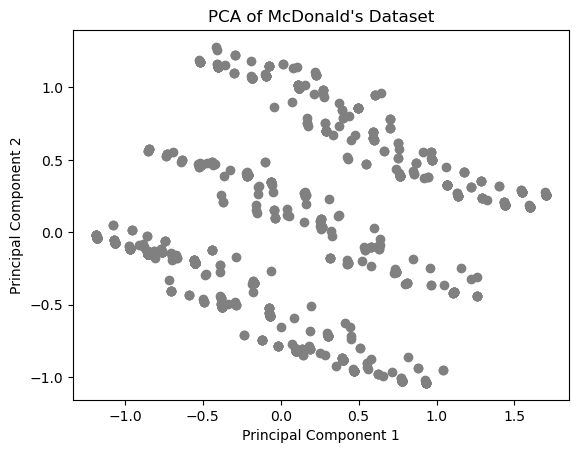

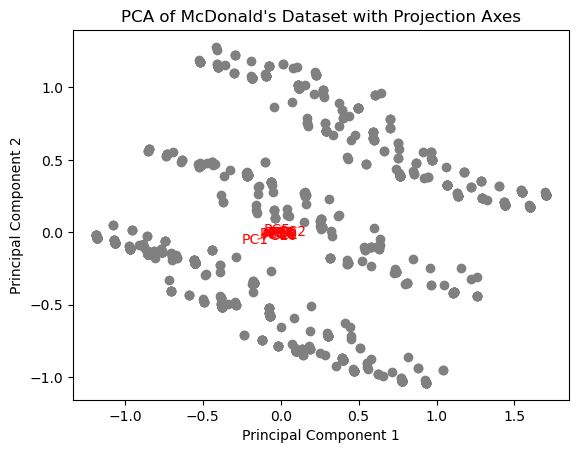

In [9]:

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonald\'s Dataset')
plt.show()


def plot_proj_axes(pca, ax):
    for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_ratio_)):
        ax.arrow(0, 0, comp[0] * var, comp[1] * var, color='r', alpha=0.5)
        ax.text(comp[0] * var * 1.15, comp[1] * var * 1.15, f'PC{i+1}', color='r', ha='center', va='center')

fig, ax = plt.subplots()
ax.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plot_proj_axes(pca, ax)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of McDonald\'s Dataset with Projection Axes')
plt.show()

In [10]:
from sklearn.cluster import KMeans

In [11]:

np.random.seed(1234)

# Perform KMeans clustering for clusters 2 to 8, repeated 10 times each
best_kmeans = None
best_inertia = np.inf

results = {}

for k in range(2, 9):
    for _ in range(10):
        kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000))
        kmeans.fit(MD_x)
        
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_kmeans = kmeans
    
    results[k] = {'model': kmeans, 'inertia': kmeans.inertia_}

# Best model based on inertia
MD_km28 = best_kmeans

# Relabel clusters to have a consistent order across runs (optional step, mimicking `relabel`)
labels = MD_km28.labels_


print(f"Best KMeans model has {MD_km28.n_clusters} clusters with inertia {best_inertia}")
print(f"Cluster labels: {labels}")

Best KMeans model has 8 clusters with inertia 1182.0828759392411
Cluster labels: [5 1 7 ... 7 4 6]


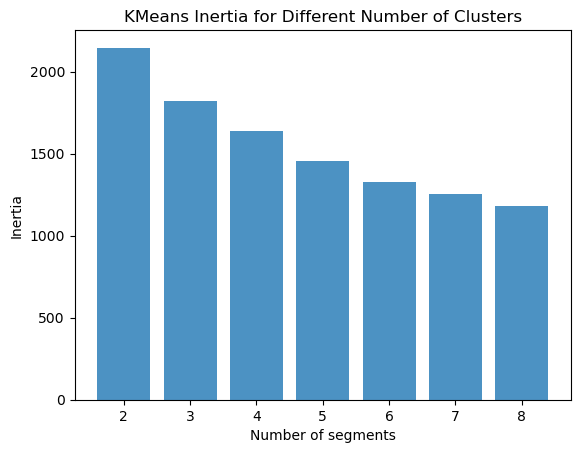

Best KMeans model has 8 clusters with inertia 1182.0828759392411
Cluster labels: [5 1 7 ... 7 4 6]


In [12]:

np.random.seed(1234)


best_kmeans = None
best_inertia = np.inf
inertia_values = []

for k in range(2, 9):
    best_local_inertia = np.inf
    for _ in range(10):
        kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000))
        kmeans.fit(MD_x)
        
        if kmeans.inertia_ < best_local_inertia:
            best_local_inertia = kmeans.inertia_
            if kmeans.inertia_ < best_inertia:
                best_inertia = kmeans.inertia_
                best_kmeans = kmeans
    
    inertia_values.append(best_local_inertia)


plt.bar(range(2, 9), inertia_values, align='center', alpha=0.8)
plt.xlabel('Number of segments')
plt.ylabel('Inertia')
plt.title('KMeans Inertia for Different Number of Clusters')
plt.show()


MD_km28 = best_kmeans


labels = MD_km28.labels_

print(f"Best KMeans model has {MD_km28.n_clusters} clusters with inertia {best_inertia}")
print(f"Cluster labels: {labels}")

In [13]:
from sklearn.cluster import KMeans
from sklearn.utils import resample
from collections import defaultdict

np.random.seed(1234)


n_bootstrap = 100
n_repeats = 10
cluster_results = defaultdict(list)

for k in range(2, 9):
    for _ in range(n_repeats):
        inertias = []
        for _ in range(n_bootstrap):
            # Bootstrap sampling
            bootstrap_sample = resample(MD_x, random_state=np.random.randint(10000))
            
            # Fit KMeans
            kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000))
            kmeans.fit(bootstrap_sample)
            inertias.append(kmeans.inertia_)
        
        # Store the mean inertia for this cluster size and repeat
        cluster_results[k].append(np.mean(inertias))


for k, results in cluster_results.items():
    print(f"Mean inertia for {k} clusters: {results}")

best_k = min(cluster_results, key=lambda x: min(cluster_results[x]))
best_mean_inertia = min(cluster_results[best_k])

print(f"Best number of clusters: {best_k}")
print(f"Best mean inertia: {best_mean_inertia}")

Mean inertia for 2 clusters: [2170.2510435488425, 2168.8905507643426, 2164.1746548380415, 2169.6114249349325, 2179.215492827444, 2170.790727409779, 2165.9723328784407, 2171.563260681901, 2170.533136875158, 2169.352566495557]
Mean inertia for 3 clusters: [1874.4143457742455, 1864.6235288415803, 1863.1602806399483, 1880.3760198970099, 1860.372238824322, 1887.151087716208, 1875.9328814492517, 1875.6918642151463, 1866.531906990031, 1871.2057129371506]
Mean inertia for 4 clusters: [1659.295855052519, 1667.8259210762883, 1665.224900846257, 1666.89830204628, 1656.8961736337303, 1670.709909014006, 1656.6834079684168, 1662.6373626185732, 1668.539958473984, 1656.970466072122]
Mean inertia for 5 clusters: [1511.4963790168724, 1503.912204405137, 1515.618975667064, 1508.1640477781546, 1508.6331961388082, 1511.0452510632913, 1510.3166115675422, 1499.9780658727086, 1518.8407065763663, 1514.5098828482965]
Mean inertia for 6 clusters: [1398.2220647946842, 1395.176257194347, 1394.917655345146, 1398.7934

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bhavya Parekh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

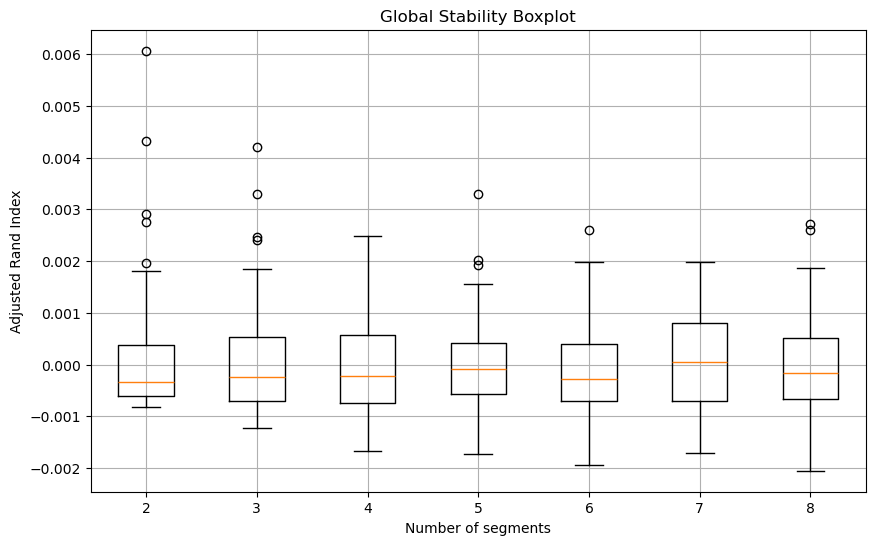

In [14]:
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)


n_bootstrap = 100
n_repeats = 10
cluster_results = defaultdict(list)

for k in range(2, 9):
    aris = []
    for _ in range(n_bootstrap):
        # Bootstrap sampling
        bootstrap_sample = resample(MD_x, random_state=np.random.randint(10000))
        
        # Fit KMeans
        kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000))
        kmeans.fit(bootstrap_sample)
        
        # Compute Adjusted Rand Index
        true_labels = np.random.randint(0, k, size=len(bootstrap_sample))  # Dummy labels
        ari = adjusted_rand_score(true_labels, kmeans.labels_)
        aris.append(ari)
    
    # Store the ARIs for this cluster size
    cluster_results[k] = aris


plt.figure(figsize=(10, 6))
plt.boxplot(cluster_results.values(), labels=cluster_results.keys())
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot')
plt.grid(True)
plt.show()

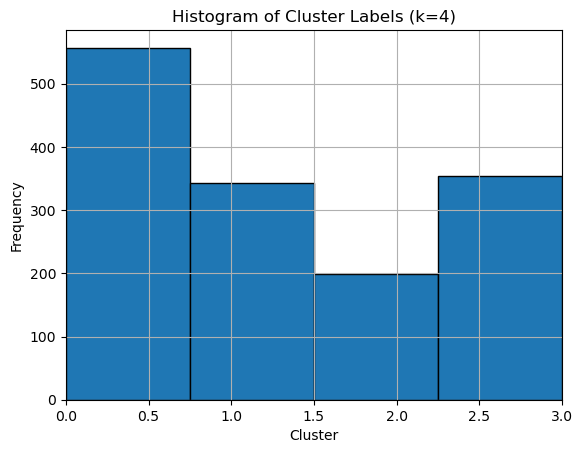

In [15]:

np.random.seed(1234)
# Perform KMeans clustering for 4 clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000))
kmeans.fit(MD_x)

# Extract cluster labels and plot histogram
cluster_labels = kmeans.labels_


plt.hist(cluster_labels, bins=k, edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Labels (k=4)')
plt.xlim(0, k-1)
plt.grid(True)
plt.show()

In [16]:

np.random.seed(1234)


k = 4
kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000))
kmeans.fit(MD_x)

# Extract cluster labels for 4 clusters
MD_k4 = kmeans.labels_

# Print and verify the cluster labels
print(MD_k4)



[1 0 3 ... 2 0 3]


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:

scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)


pca = PCA()
MD_pca = pca.fit_transform(MD_x_scaled)


np.random.seed(1234)


k = 4
kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000))
kmeans.fit(MD_x_scaled)


MD_k4 = kmeans.labels_


mcdonalds['Cluster'] = MD_k4

print(mcdonalds[['Cluster']].head())



# Save the results or perform further analysis as needed
mcdonalds.to_csv("labeled_mcdonalds_dataset.csv", index=False)

   Cluster
0        3
1        3
2        3
3        0
4        0


In [19]:
from sklearn.metrics import silhouette_score

In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from collections import defaultdict

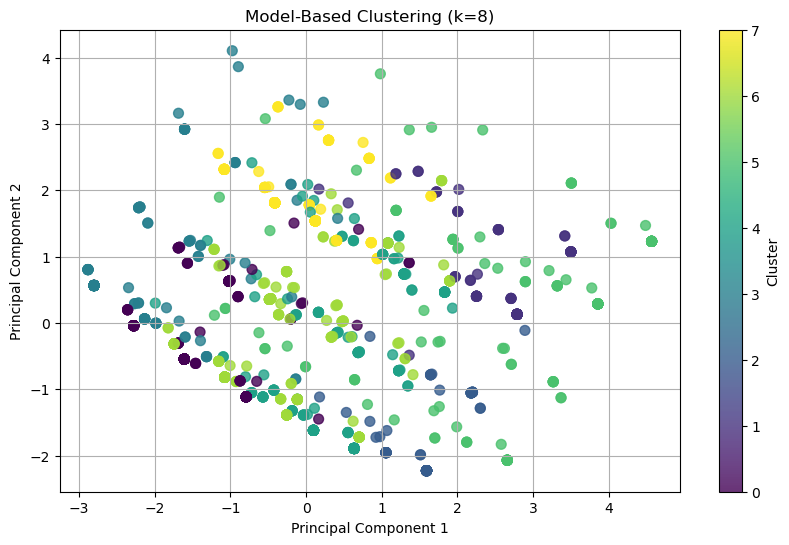

Best model with k=8 has BIC score: -45411.5696122249


In [21]:

np.random.seed(1234)


k_range = range(2, 9)
n_repeats = 10
models = {}

for k in k_range:
    bic_scores = []
    for _ in range(n_repeats):
        # Initialize and fit Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=np.random.randint(10000))
        gmm.fit(MD_x_scaled)
        bic_scores.append(gmm.bic(MD_x_scaled))
    # Store the model with the lowest BIC score
    models[k] = (gmm, np.min(bic_scores))

# Choose the model with the lowest BIC score
best_k = min(models, key=lambda k: models[k][1])
best_gmm, best_bic = models[best_k]

# Get the cluster labels for the best model
MD_labels = best_gmm.predict(MD_x_scaled)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_labels, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Model-Based Clustering (k={best_k})')
plt.grid(True)
plt.show()


print(f"Best model with k={best_k} has BIC score: {best_bic}")

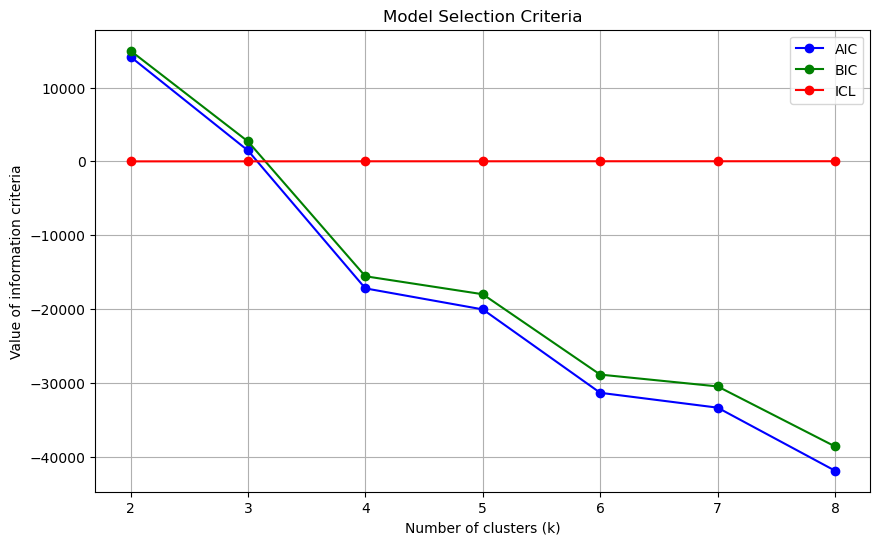

In [22]:

np.random.seed(1234)


k_range = range(2, 9)
n_repeats = 10
models = {}


aic_values = []
bic_values = []
icl_values = []

for k in k_range:
    aic_scores = []
    bic_scores = []
    icl_scores = []
    for _ in range(n_repeats):
       el
        gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=np.random.randint(10000))
        gmm.fit(MD_x_scaled)
        aic_scores.append(gmm.aic(MD_x_scaled))
        bic_scores.append(gmm.bic(MD_x_scaled))
        icl_scores.append(gmm.lower_bound_)
 
    aic_values.append(np.mean(aic_scores))
    bic_values.append(np.mean(bic_scores))
    icl_values.append(np.mean(icl_scores))


plt.figure(figsize=(10, 6))
plt.plot(k_range, aic_values, marker='o', linestyle='-', color='b', label='AIC')
plt.plot(k_range, bic_values, marker='o', linestyle='-', color='g', label='BIC')
plt.plot(k_range, icl_values, marker='o', linestyle='-', color='r', label='ICL')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Value of information criteria')
plt.title('Model Selection Criteria')
plt.legend()
plt.grid(True)
plt.show()

In [23]:

np.random.seed(1234)


k = 4
kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000))
MD_k4 = kmeans.fit_predict(MD_x_scaled)

# Fit a Gaussian Mixture Model on the KMeans clusters
gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=np.random.randint(10000))
MD_m4a = gmm.fit(MD_x_scaled)

# Get the cluster assignments from GMM
MD_m4a_clusters = MD_m4a.predict(MD_x_scaled)

# Create a contingency table
contingency_table = pd.crosstab(index=MD_k4, columns=MD_m4a_clusters, rownames=['kmeans'], colnames=['mixture'])

print("Contingency Table (KMeans vs Gaussian Mixture Model):")
print(contingency_table)

Contingency Table (KMeans vs Gaussian Mixture Model):
mixture    0   1    2    3
kmeans                    
0        194  43    0  489
1        110   9   13    0
2          0   0  171    0
3        124  57    9  234


In [24]:

np.random.seed(1234)


k = 4
kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000))
MD_k4 = kmeans.fit_predict(MD_x_scaled)


gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=np.random.randint(10000))
MD_m4a = gmm.fit(MD_x_scaled)


log_likelihood_kmeans = gmm.score(MD_x_scaled)
log_likelihood_gmm = MD_m4a.score(MD_x_scaled)

print(f"Log-likelihood (KMeans + GMM): {log_likelihood_kmeans:.3f}")
print(f"Log-likelihood (GMM): {log_likelihood_gmm:.3f}")

Log-likelihood (KMeans + GMM): 7.116
Log-likelihood (GMM): 7.116


In [25]:
# Assuming "Like" is a column in your dataset
like_counts = mcdonalds['Like'].value_counts()

# Reverse the order of the table
reversed_table = like_counts.sort_index(ascending=False)

print("Reversed Table of Like:")
print(reversed_table)

Reversed Table of Like:
Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [26]:

mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Create new column "Like.n"
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Calculate the table of Like.n
like_n_table = mcdonalds['Like.n'].value_counts().sort_index()

print("Table of Like.n:")
print(like_n_table)

Table of Like.n:
Like.n
2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: count, dtype: int64


In [27]:
pip install patsy

In [28]:
from patsy import dmatrices

In [29]:

mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')


mcdonalds['Like_n'] = 6 - mcdonalds['Like']

formula_str = "Like_n ~ " + " + ".join(mcdonalds.columns[0:11])

y, X = dmatrices(formula_str, data=mcdonalds, return_type='dataframe')

print("Formula object (Design Matrix X):")
print(X.design_info)

Formula object (Design Matrix X):
DesignInfo(['Intercept',
            'yummy[T.Yes]',
            'convenient[T.Yes]',
            'spicy[T.Yes]',
            'fattening[T.Yes]',
            'greasy[T.Yes]',
            'fast[T.Yes]',
            'cheap[T.Yes]',
            'tasty[T.Yes]',
            'expensive[T.Yes]',
            'healthy[T.Yes]',
            'disgusting[T.Yes]'],
           factor_infos={EvalFactor('yummy'): FactorInfo(factor=EvalFactor('yummy'),
                                    type='categorical',
                                    state=<factor state>,
                                    categories=('No', 'Yes')),
                         EvalFactor('convenient'): FactorInfo(factor=EvalFactor('convenient'),
                                    type='categorical',
                                    state=<factor state>,
                                    categories=('No', 'Yes')),
                         EvalFactor('spicy'): FactorInfo(factor=EvalFactor('sp

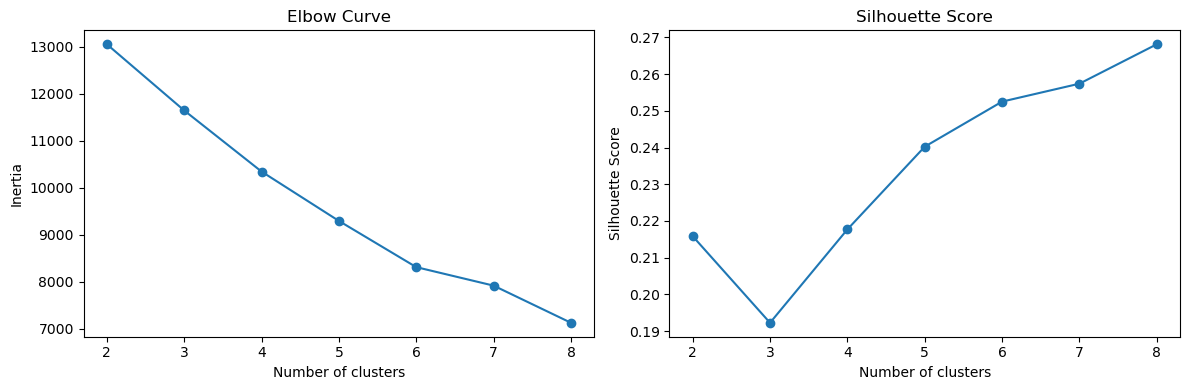

Cluster Centers:
[[ 5.66176471e-01  9.33823529e-01  1.00000000e+00  8.23529412e-01
   6.10294118e-01  9.19117647e-01  6.25000000e-01  7.35294118e-01
   4.26470588e-01  3.30882353e-01  2.86764706e-01]
 [ 1.81286551e-01  2.69005851e-01 -3.88578059e-16  8.47953216e-01
   7.01754386e-01  4.97076024e-01  3.09941521e-01  1.87134504e-01
   6.43274853e-01  5.26315787e-02  6.43274852e-01]
 [ 1.78925659e-01  1.00000000e+00  1.38777878e-17  9.26471174e-01
   6.37255380e-01  1.00000000e+00  6.02941470e-01  1.61772069e-01
   3.48039808e-01  8.57836999e-02  4.99995608e-01]
 [ 8.42819391e-01  1.00000000e+00 -5.55111512e-17  8.46882759e-01
   4.09212721e-01  9.34959034e-01  6.58536693e-01  1.00000000e+00
   2.84552210e-01  2.71003949e-01 -1.66533454e-16]]
             Like        Age  Cluster    Like.n    Like_n
Cluster                                                  
0        0.754545  51.073529      0.0  5.245455  5.245455
1       -0.967391  46.654971      1.0  6.967391  6.967391
2       -0.466077 

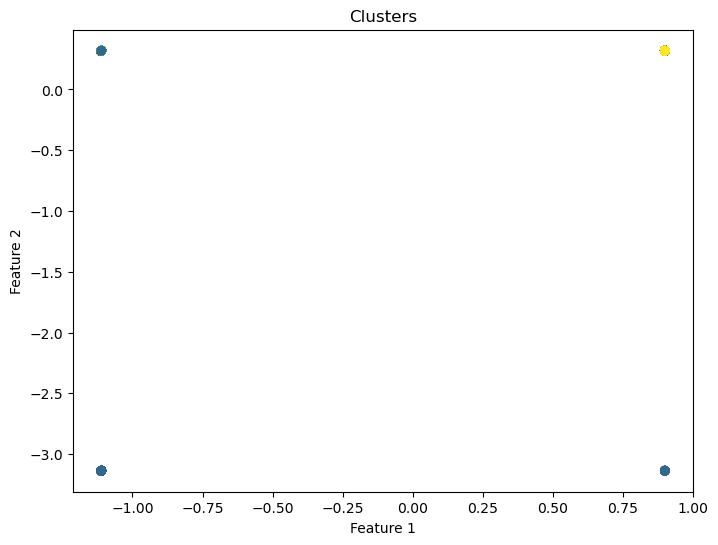

In [30]:
from sklearn import metrics

mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')


mcdonalds['Like_n'] = 6 - mcdonalds['Like']


features = mcdonalds.iloc[:, 0:11].copy()  # Adjust columns as needed
features = features.apply(lambda col: col.map({'Yes': 1, 'No': 0}))

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Find optimal number of clusters using the Elbow method and Silhouette scores
inertias = []
silhouette_scores = []
max_k = 8

for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(metrics.silhouette_score(features_scaled, kmeans.labels_))

# Plotting elbow curve and silhouette scores
plt.figure(figsize=(12, 4))

# Plot elbow curve
plt.subplot(1, 2, 1)
plt.plot(range(2, max_k + 1), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()


best_k = 4  # Example: Choose the optimal number of clusters


gmm = GaussianMixture(n_components=best_k, random_state=1234, n_init=10)
gmm.fit(features_scaled)


cluster_labels = gmm.predict(features_scaled)

mcdonalds['Cluster'] = cluster_labels

numeric_columns = mcdonalds.select_dtypes(include=[np.number]).columns


print("Cluster Centers:")
print(scaler.inverse_transform(gmm.means_))

print(mcdonalds.groupby('Cluster')[numeric_columns].mean())


plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters')
plt.show()

In [31]:

best_k = 4 


gmm = GaussianMixture(n_components=best_k, random_state=1234, n_init=10)
gmm.fit(features_scaled)

print("Converged:", gmm.converged_)
print("Number of iterations:", gmm.n_iter_)
print("Lower bound of the log-likelihood:", gmm.lower_bound_)
print("\nMeans of each Gaussian component:\n", scaler.inverse_transform(gmm.means_))
print("\nCovariances of each Gaussian component:\n", gmm.covariances_)


mcdonalds['Cluster'] = gmm.predict(features_scaled)


numeric_columns = mcdonalds.select_dtypes(include=[np.number]).columns


print("\nCluster centers (mean values):")
print(mcdonalds.groupby('Cluster')[numeric_columns].mean())


print("\nCluster counts:")
print(mcdonalds['Cluster'].value_counts())

Converged: True
Number of iterations: 7
Lower bound of the log-likelihood: 7.390977474321997

Means of each Gaussian component:
 [[ 5.66176471e-01  9.33823529e-01  1.00000000e+00  8.23529412e-01
   6.10294118e-01  9.19117647e-01  6.25000000e-01  7.35294118e-01
   4.26470588e-01  3.30882353e-01  2.86764706e-01]
 [ 1.81286551e-01  2.69005851e-01 -3.88578059e-16  8.47953216e-01
   7.01754386e-01  4.97076024e-01  3.09941521e-01  1.87134504e-01
   6.43274853e-01  5.26315787e-02  6.43274852e-01]
 [ 1.78925659e-01  1.00000000e+00  1.38777878e-17  9.26471174e-01
   6.37255380e-01  1.00000000e+00  6.02941470e-01  1.61772069e-01
   3.48039808e-01  8.57836999e-02  4.99995608e-01]
 [ 8.42819391e-01  1.00000000e+00 -5.55111512e-17  8.46882759e-01
   4.09212721e-01  9.34959034e-01  6.58536693e-01  1.00000000e+00
   2.84552210e-01  2.71003949e-01 -1.66533454e-16]]

Covariances of each Gaussian component:
 [[[ 9.93499571e-01  1.07104822e-01  1.23259516e-32 -1.48659619e-01
   -1.77489078e-01  6.0585341

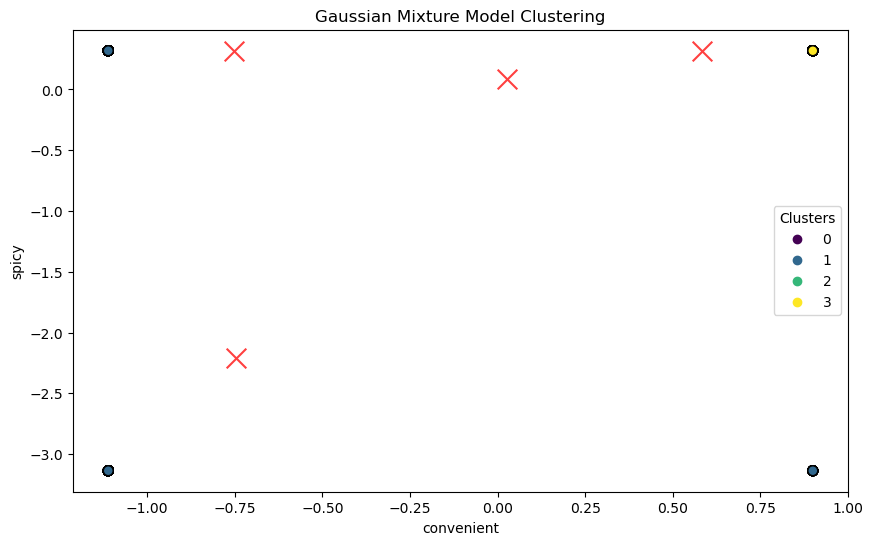

In [32]:

def plot_gmm_results(gmm, features_scaled, feature_names, significance=False):
 
    clusters = gmm.predict(features_scaled)
    

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
  
    centers = gmm.means_[:, :2]  # Use the first two dimensions for plotting
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
    
    plt.title('Gaussian Mixture Model Clustering')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    
 
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.show()
plot_gmm_results(gmm, features_scaled, feature_names=mcdonalds.columns[1:12])

C:\Users\Bhavya Parekh\AppData\Local\Temp\ipykernel_38572\40748819.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted_df, x='Feature', y='Value', hue='Cluster', ci=None)


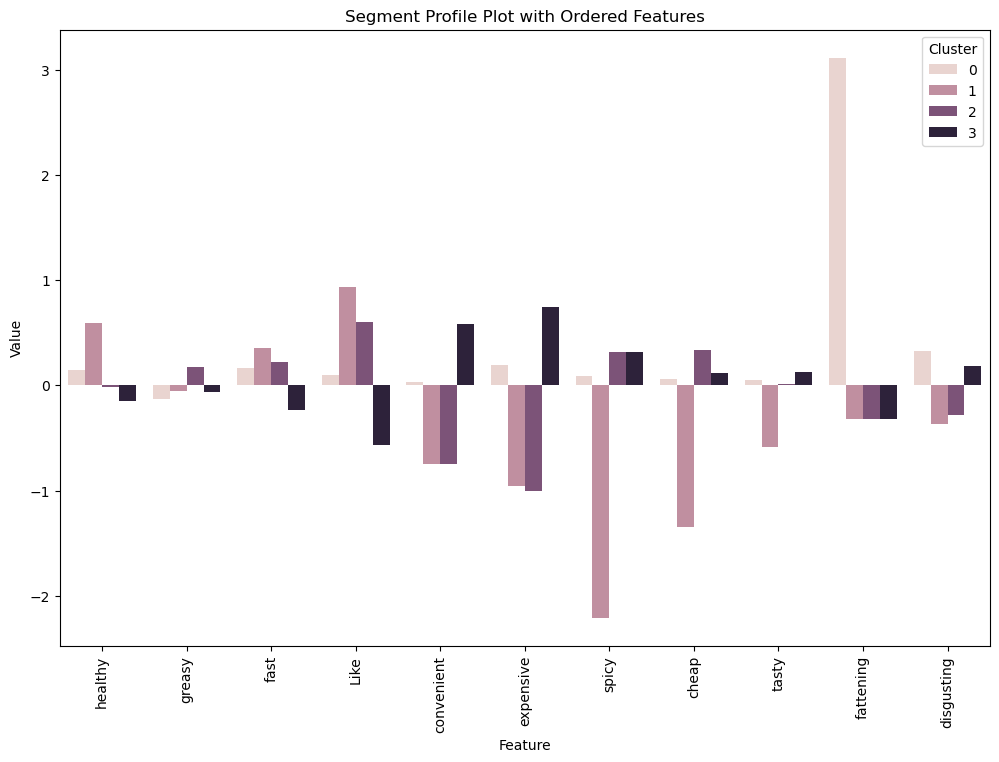

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import seaborn as sns

features_transposed = features_scaled.T


Z = linkage(pdist(features_transposed), method='ward')


dendro = dendrogram(Z, no_plot=True)
ordered_features = [features_transposed[i] for i in dendro['leaves']]
ordered_feature_names = [mcdonalds.columns[1:12][i] for i in dendro['leaves']]

ordered_features_df = pd.DataFrame(ordered_features).T
ordered_features_df.columns = ordered_feature_names


clusters = gmm.predict(features_scaled)
ordered_features_df['Cluster'] = clusters

# Melt the DataFrame for easier plotting with seaborn
melted_df = ordered_features_df.melt(id_vars='Cluster', var_name='Feature', value_name='Value')

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_df, x='Feature', y='Value', hue='Cluster', ci=None)
plt.title('Segment Profile Plot with Ordered Features')
plt.xticks(rotation=90)
plt.show()

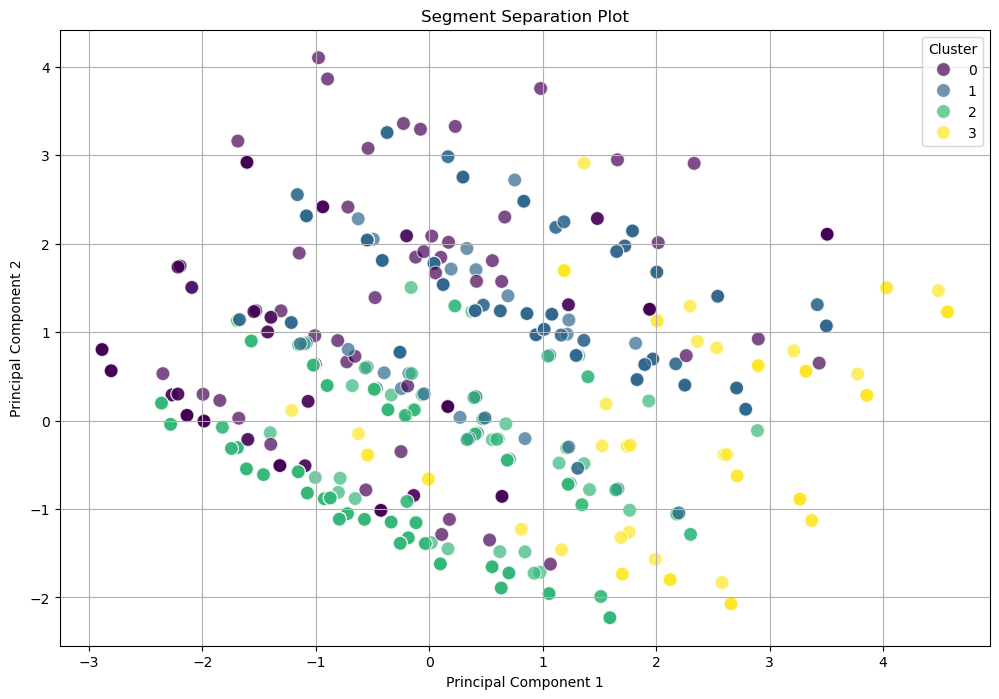

In [34]:

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

gmm = GaussianMixture(n_components=4, random_state=0)
clusters = gmm.fit_predict(features_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = clusters

# Plot the PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', s=100, alpha=0.7)

# Customize the plot
plt.title('Segment Separation Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)

plt.show()

In [37]:


scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)


np.random.seed(1234)


k = 4
kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000))
MD_k4 = kmeans.fit_predict(MD_x_scaled)


mcdonalds['MD_k4'] = MD_k4

 
frequency_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Once a month': 2,
    'Once a week': 4,
    'More than once a week': 5,
    'Every three months': 3
}

mcdonalds['VisitFrequency'] = mcdonalds['VisitFrequency'].map(frequency_mapping)


visit = mcdonalds.groupby('MD_k4')['VisitFrequency'].mean()
print("\nAverage visit frequency for each cluster:")
print(visit)


Average visit frequency for each cluster:
MD_k4
0    2.406336
1    1.090909
2    2.719298
3    2.382075
Name: VisitFrequency, dtype: float64


In [39]:

mcdonalds['Like.n'] = 6 - mcdonalds['Like']


like = mcdonalds.groupby('MD_k4')['Like.n'].mean()


print(like)

MD_k4
0    4.852751
1    8.120690
2    3.946565
3    5.091168
Name: Like.n, dtype: float64


In [40]:

female = mcdonalds['Gender'].eq('Female').groupby(mcdonalds['MD_k4']).mean()


print(female)

MD_k4
0    0.606061
1    0.424242
2    0.491228
3    0.490566
Name: Gender, dtype: float64


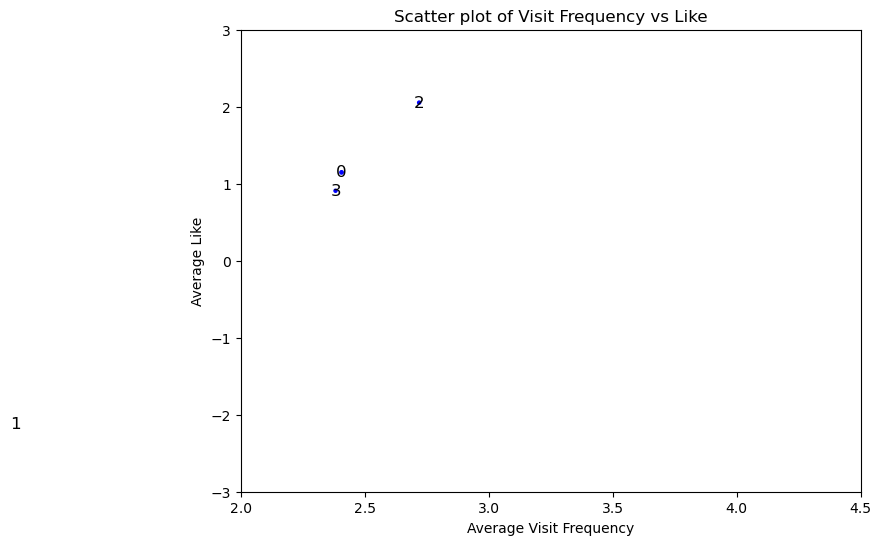

In [45]:
# Calculate average visit frequency and like for each group
visit = mcdonalds.groupby('MD_k4')['VisitFrequency'].mean()
like = mcdonalds.groupby('MD_k4')['Like'].mean()

plt.figure(figsize=(8, 6))


plt.scatter(visit, like, s=10 * female, color='blue')


for i, txt in enumerate(visit.index):
    plt.text(visit[i], like[i], txt, fontsize=12, ha='center', va='center')


plt.xlim(2, 4.5)
plt.ylim(-3, 3)


plt.xlabel('Average Visit Frequency')
plt.ylabel('Average Like')
plt.title('Scatter plot of Visit Frequency vs Like')


plt.show()